In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

In [3]:
accidents_df = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-last-5-years.csv')
accidents_df
print('Accidents 2016-2020 Dataframe')
print('Records:', accidents_df.shape[0], '\nColumns:', accidents_df.shape[1])


Accidents 2016-2020 Dataframe
Records: 597973 
Columns: 36


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
casualties_df = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-last-5-years.csv')
casualties_df
print('Casualties 2016-2020 Dataframe')
print('Records:', casualties_df.shape[0], '\nColumns:', casualties_df.shape[1])

Casualties 2016-2020 Dataframe
Records: 781716 
Columns: 18


In [5]:
vehicles_df = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-last-5-years.csv')
print('Vehicles 2016-2020 Dataframe')
print('Records:', vehicles_df.shape[0], '\nColumns:', vehicles_df.shape[1])


Vehicles 2016-2020 Dataframe
Records: 1101591 
Columns: 27


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,2,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print('Proportion of Missing Values in Accidents Table:', round(accidents_df.isna().sum().sum()/len(accidents_df),3), '%')
print('Proportion of Missing Values in Casualties Table:', round(casualties_df.isna().sum().sum()/len(casualties_df),3), '%')

#Drop NaN values
accidents_df.dropna(inplace=True)
casualties_df.dropna(inplace=True)


Proportion of Missing Values in Accidents Table: 0.001 %
Proportion of Missing Values in Casualties Table: 0.0 %


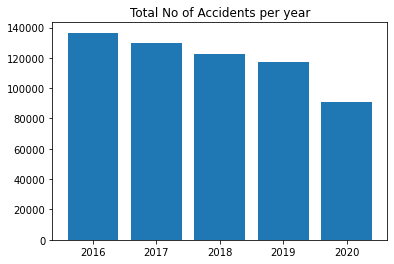

In [7]:
#Total Number of Accidents per Year
accidents_per_year = (accidents_df.groupby(accidents_df['accident_year'])
                      ['accident_index'].count().rename('Total no of accidents').to_frame())
plt.title("Total No of Accidents per year")
plt.bar(x = accidents_per_year.index, height= accidents_per_year['Total no of accidents'])
plt.show()

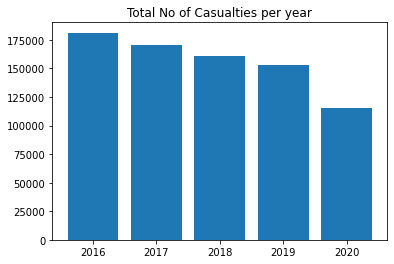

In [8]:
#Total Number of Casualties per Year
casualties_per_year = (accidents_df.groupby(accidents_df['accident_year'])
                      ['number_of_casualties'].sum().rename('Total no of casualties').to_frame())
plt.title("Total No of Casualties per year")
plt.bar(x = casualties_per_year.index, height= casualties_per_year['Total no of casualties'])
plt.show()

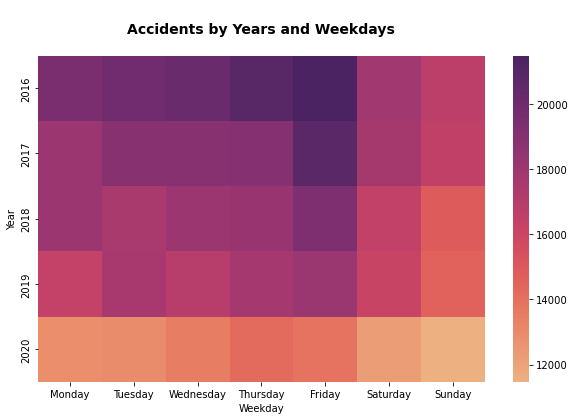

In [25]:
#Accidents per week and time of the day

accidents_df['date'] = pd.to_datetime(accidents_df['date'])
weekday = accidents_df['date'].dt.day_name()
year = accidents_df['date'].dt.year
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accident_table = accidents_df.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)

plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='flare')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.show()

In [10]:
#Match the numerical values with the respective labels
road_safety_guide = pd.read_excel("C:/Users/user/Desktop/TU Eindhoven/Q2/Visualization/Road_safety_data_Visualization/data/Road-Safety-Open-Dataset-Data-Guide.xlsx")

for i in range(len(road_safety_guide['field name'])):
    for header in list(accidents_df):
        if road_safety_guide['field name'][i] == header and not pd.isna(road_safety_guide['code/format'][i]):
            accidents_df[header].replace(road_safety_guide['code/format'][i], road_safety_guide['label'][i], inplace=True)

    for header in list(casualties_df):
        if road_safety_guide['field name'][i] == header and not pd.isna(road_safety_guide['code/format'][i]):
            casualties_df[header].replace(road_safety_guide['code/format'][i], road_safety_guide['label'][i], inplace=True)

                   Total No of accidents
casualty_severity                       
Fatal                               8581
Serious                           119175
Slight                            653960


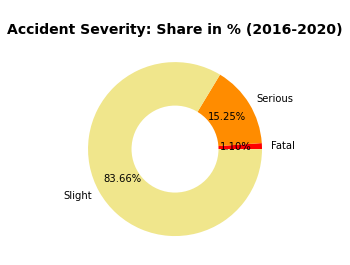

In [11]:
"""Accident severity"""
cas_severity_df = (casualties_df.groupby(['casualty_severity'])
                      ['accident_index'].count().rename('Total No of accidents').to_frame())
#cas_severity_df.reset_index(inplace=True)
print(cas_severity_df)
#define data
data = cas_severity_df['Total No of accidents']
labels = cas_severity_df.index

#define Seaborn color palette to use
colors = ['red', 'darkorange', 'khaki']

plt.title('\nAccident Severity: Share in % (2016-2020)', fontsize=14, fontweight='bold')
# Pie Chart
plt.pie(data, colors=colors, labels=labels,
        autopct='%1.2f%%', pctdistance=0.7)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%1.2f%%')
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_25200/849486098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leicester_acc['date'] = pd.to_datetime(leicester_acc['date'])
C:\Users\user\AppData\Local\Temp/ipykernel_25200/849486098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leicester_acc['hour'] = leicester_acc['time'].str[0:2]
C:\Users\user\AppData\Local\Temp/ipykernel_25200/849486098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

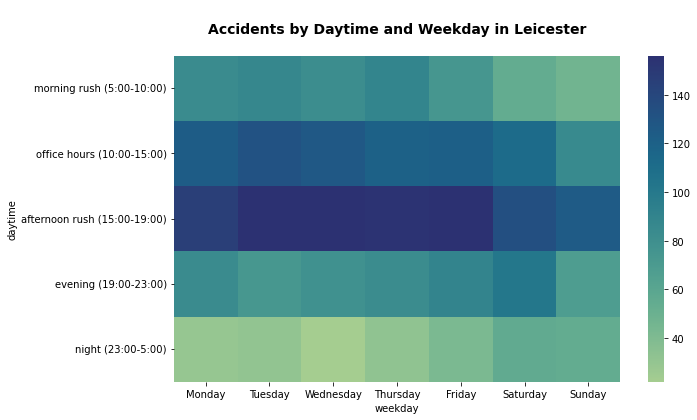

In [31]:
leicester_acc = accidents_df[accidents_df['local_authority_district']=='Leicester']
leicester_acc['date'] = pd.to_datetime(leicester_acc['date'])
weekday = leicester_acc['date'].dt.day_name()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# slice first and second string from time column
leicester_acc['hour'] = leicester_acc['time'].str[0:2]
# convert new column to numeric datetype
leicester_acc['hour'] = pd.to_numeric(leicester_acc['hour'])
# drop null values in our new column
leicester_acc = leicester_acc.dropna(subset=['hour'])
# cast to integer values
leicester_acc['hour'] = leicester_acc['hour'].astype('int')
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5:00-10:00)"
    elif hour >= 10 and hour < 15:
        return "office hours (10:00-15:00)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15:00-19:00)"
    elif hour >= 19 and hour < 23:
        return "evening (19:00-23:00)"
    else:
        return "night (23:00-5:00)"

# apply thus function to our temporary hour column
leicester_acc['daytime'] = leicester_acc['hour'].apply(when_was_it)
daytime = leicester_acc['daytime'].values
timeslots = ['morning rush (5:00-10:00)','office hours (10:00-15:00)','afternoon rush (15:00-19:00)',
             'evening (19:00-23:00)','night (23:00-5:00)']
daytime_week_table = leicester_acc.groupby([daytime, weekday],sort=False).size()
daytime_week_table = daytime_week_table.rename_axis(['daytime', 'weekday'])\
                               .unstack('weekday')\
                               .reindex(index = timeslots, columns=days)
plt.figure(figsize=(10,6))
sns.heatmap(daytime_week_table, cmap='crest')
plt.title('\nAccidents by Daytime and Weekday in Leicester\n', fontsize=14, fontweight='bold')
plt.show()

In [13]:
casualty_vehicle_df = casualties_df.merge(vehicles_df, on=['accident_index','vehicle_reference','accident_year','accident_reference'],how='inner')
print('Records:', casualty_vehicle_df.shape[0], '\nColumns:', casualty_vehicle_df.shape[1])
casualty_vehicle_df.head()


Records: 679512 
Columns: 41


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,2,1,Driver or rider,Male,23,21 - 25,Slight,...,6,1,23,5,124,1,4,-1,4,1
1,2016010000006,2016,010000006,1,1,Driver or rider,Female,36,36 - 45,Slight,...,6,2,36,7,1461,2,1,-1,10,1
2,2016010000008,2016,010000008,1,1,Driver or rider,Male,24,21 - 25,Slight,...,6,1,24,5,1390,1,5,-1,8,1
3,2016010000016,2016,010000016,1,1,Passenger,Female,59,56 - 65,Slight,...,1,1,55,8,6692,2,7,-1,9,1
4,2016010000018,2016,010000018,2,1,Driver or rider,Male,28,26 - 35,Slight,...,6,1,28,6,-1,-1,-1,-1,6,1


In [14]:
acc_cas_veh_df = casualty_vehicle_df.merge(accidents_df, on=['accident_index','accident_year','accident_reference'],how='inner')
print('Records:', acc_cas_veh_df.shape[0], '\nColumns:', acc_cas_veh_df.shape[1])
acc_cas_veh_df.head()

Records: 633558 
Columns: 74


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,2,1,Driver or rider,Male,23,21 - 25,Slight,...,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,1,1,Driver or rider,Female,36,36 - 45,Slight,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,1,1,Driver or rider,Male,24,21 - 25,Slight,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,1,1,Passenger,Female,59,56 - 65,Slight,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,2,1,Driver or rider,Male,28,26 - 35,Slight,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


In [15]:
import numpy as np
for i in range(len(road_safety_guide['field name'])):
    for header in list(acc_cas_veh_df):
        if road_safety_guide['field name'][i] == header and not pd.isna(road_safety_guide['code/format'][i]):
            acc_cas_veh_df[header].replace(road_safety_guide['code/format'][i], road_safety_guide['label'][i], inplace=True)
            
acc_cas_veh_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,2,1,Driver or rider,Male,23,21 - 25,Slight,...,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,1,1,Driver or rider,Female,36,36 - 45,Slight,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,1,1,Driver or rider,Male,24,21 - 25,Slight,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,1,1,Passenger,Female,59,56 - 65,Slight,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,2,1,Driver or rider,Male,28,26 - 35,Slight,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


In [42]:
def vehicle(veh_type):
    if veh_type == 'Car' or veh_type == 'Taxi/Private hire car':
        return "Car"
    elif (veh_type == 'Motorcycle 50cc and under') or  (veh_type =='Mobility scooter')or (veh_type =='Motorcycle - unknown cc') or (veh_type == 'Motorcycle 125cc and under')or (veh_type =='Motorcycle 50cc and under') or (veh_type == 'Motorcycle over 125cc and up to 500cc')or (veh_type =='Motorcycle over 500cc'):      
        return "Motorcycle"
    elif veh_type == 'Bus or coach (17 or more pass seats)' or veh_type == 'Minibus (8 - 16 passenger seats)':
        return "Bus"
    elif veh_type == 'Agricultural vehicle' or veh_type =='Goods 7.5 tonnes mgw and over' or veh_type =='Goods over 3.5t. and under 7.5t' or veh_type == 'Van / Goods 3.5 tonnes mgw or under':
        return "Truck"
    else:
        return "Other Vehicle"

# apply thus function to vehicle column
acc_cas_veh_df['vehicle'] = acc_cas_veh_df['vehicle_type'].apply(vehicle)


In [43]:
acc_cas_veh_leicester = acc_cas_veh_df[acc_cas_veh_df['local_authority_district']=='Leicester']
vehicle_type_casualties = (acc_cas_veh_leicester.groupby(['vehicle'])
                      ['number_of_casualties'].sum().rename('Accidents').to_frame())
vehicle_type_casualties

,Accidents
vehicle,
Bus,244
Car,5806
Motorcycle,295
Other Vehicle,634
Truck,169


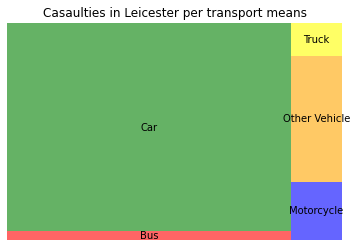

In [47]:
plt.title("Casaulties in Leicester per transport means")
color = ['red', 'green', 'blue','orange','yellow']
squarify.plot(sizes=vehicle_type_casualties['Accidents'], label=vehicle_type_casualties.index, alpha=0.6,color=color)
plt.axis('off')
plt.show()

In [48]:
#light/weather/road conditions
lc_df = (acc_cas_veh_df.groupby(['light_conditions'])
                      ['accident_index'].count().rename('Accidents').to_frame())
wc_df = (acc_cas_veh_df.groupby(['weather_conditions'])
                      ['accident_index'].count().rename('Accidents').to_frame())
rsc_df =(acc_cas_veh_df.groupby(['road_surface_conditions'])
                      ['accident_index'].count().rename('Accidents').to_frame())

[]

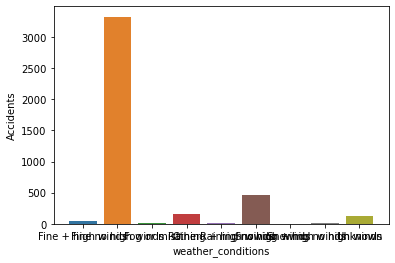

In [49]:
ax = sns.barplot(x=wc_df.index, y=wc_df['Accidents'], data=wc_df)
plt.plot()
    

                   accident_index                                
speed_limit                  20.0    30.0   40.0  50.0 60.0  70.0
road_type                                                        
Dual carriageway              NaN   520.0  192.0  18.0  NaN  11.0
One way street                4.0   235.0    2.0   NaN  2.0   NaN
Roundabout                    NaN   163.0   29.0   NaN  NaN   NaN
Single carriageway           18.0  2814.0  131.0  16.0  6.0   NaN
Slip road                     NaN     9.0    NaN   NaN  NaN   NaN


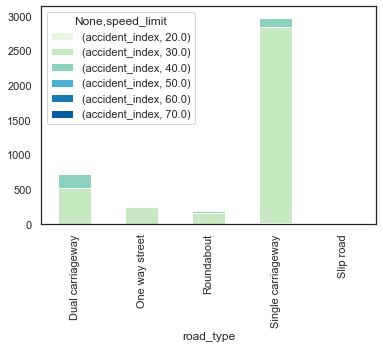

In [58]:
from matplotlib.colors import ListedColormap
road_speed_df = (acc_cas_veh_df.groupby(['road_type','speed_limit'])['accident_index'].count().to_frame())
road_speed_table = road_speed_df.unstack('speed_limit')

print(road_speed_table)
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
road_speed_table.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("GnBu", 10)))
plt.show()
